In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn import tree
import pydotplus
import graphviz
from IPython.display import Image
%matplotlib inline

In [4]:
data = pd.read_csv('insurance.csv')

In [5]:
data.sex = (data.sex == 'female').astype(int)

In [6]:
data.smoker = (data.smoker == 'yes').astype(int)

In [7]:
data = pd.get_dummies(data, columns=['region'])

In [15]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


In [25]:
#First try using decision tree
decision_tree = tree.DecisionTreeRegressor(

    max_features=1,
    max_depth=6,
)

In [26]:
X = data.drop(columns=['charges'])
y = data['charges']

In [27]:
decision_tree.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=1,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

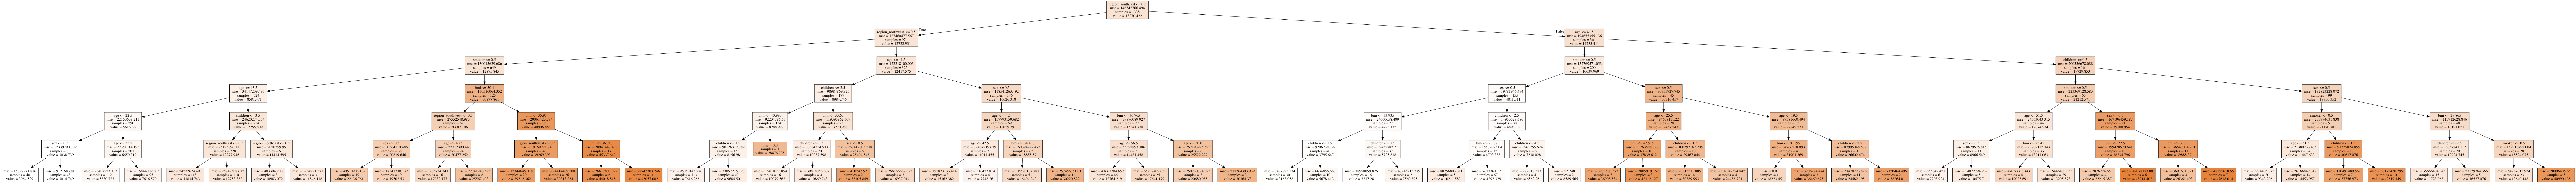

In [28]:
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [30]:
cross_val_score(decision_tree, X, y, cv=10)

array([0.42256644, 0.21388934, 0.05277331, 0.10309652, 0.33632321,
       0.46458789, 0.35110097, 0.26731434, 0.4055671 , 0.14751096])

In [ ]:
#Relative quick, Using regression it is a pretty complicated treee
#Don't have a ton of end points, could stand to go more than 6 deep
#CVS is not very consisent but also relatively low

In [32]:
#Now we will try running the random forest model
rfr = ensemble.RandomForestRegressor()
cross_val_score(rfr, X, y, cv=10)

array([0.85540869, 0.83863926, 0.81275428, 0.7179897 , 0.85246734,
       0.86712661, 0.82138837, 0.79553203, 0.82915383, 0.85134418])

Relatively quick as well, with only a small subset of data - probably not too much of a cost difference between Random Forest Model and Decision Tree, but the CSV clearly shows the benefits of running the RFM over just a signal decision tree, where we have not only increased accuracy but a decrease in variance across all the different folds.